In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import random

In [68]:
C = 3
df = pd.read_csv(f'output/error_{C}.csv')

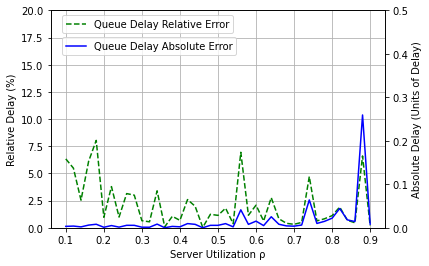

In [61]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.rho, df.q_rel_error*100.0, 'g-',linestyle='dashed')
ax2.plot(df.rho, df.abs_error, 'b-')
ax1.set_xlabel('Server Utilization \u03C1')
ax1.set_xticks(np.arange(0.1,1.0,0.1))
ax1.set_ylabel('Relative Delay (%)')
ax2.set_ylabel('Absolute Delay (Units of Delay)')
ax1.set_ylim(0,20)
ax2.set_ylim(0,0.5)
#ax2.set_ylim(0,int(1.3 * max(df.abs_error)* 1.0))
ax1.grid()
ax1.legend(('Queue Delay Relative Error','System Delay Absolute Error'),loc=1, bbox_to_anchor=(0.56,1.0))
ax2.legend(('Queue Delay Absolute Error','System Delay Absolute Error'),loc=1, bbox_to_anchor=(0.57,0.9))
#ax2.gca().legend(('System Delay Relative Error (%)','System Delay Absolute Error'))

In [69]:
df

,rel_error,abs_error,q_rel_error,true_delay,formula_delay,rho
0,0.039998,0.041718,0.969947,0.043011,0.001293,0.10
1,0.047569,0.050045,0.961410,0.052054,0.002009,0.12
2,0.053152,0.056300,0.950516,0.059231,0.002931,0.14
3,0.056444,0.060065,0.936373,0.064146,0.004081,0.16
4,0.065289,0.070232,0.927591,0.075714,0.005482,0.18
5,0.070438,0.076318,0.914266,0.083475,0.007157,0.20
6,0.072969,0.079431,0.896932,0.088558,0.009128,0.22
7,0.078509,0.086170,0.882981,0.097590,0.011420,0.24
8,0.083501,0.092390,0.867920,0.106450,0.014060,0.26
9,0.086093,0.095812,0.848738,0.112887,0.017076,0.28


In [9]:
lamda = 0.5
horizon = 10000
arrivals =  [0 for _ in range(horizon)]
for i in range(1,horizon):
                arrivals[i] = arrivals[i-1] + random.expovariate(lamda)

In [10]:
arrivals

[0,
 2.98050379560453,
 3.252785483111138,
 8.48614217965267,
 9.408689892084949,
 9.670449181668015,
 10.505441379981445,
 11.428409758183196,
 12.184294035558295,
 12.319866908046787,
 14.536295608232965,
 16.337993191579944,
 17.563549189998824,
 19.26157097826594,
 19.94036604607169,
 20.851452230603208,
 22.336972544764617,
 24.25202937179959,
 26.21935309535927,
 26.787575661850642,
 28.748443255279348,
 30.22068003620107,
 30.716922336310688,
 30.7399018870977,
 33.57163927203129,
 36.02868804674898,
 40.351085080399585,
 41.47880781400673,
 42.97833064370393,
 44.18682278670523,
 45.61144882738834,
 48.45747148680485,
 53.27833659772744,
 53.74760485143251,
 55.18726322386212,
 57.83000469468669,
 58.848146306013945,
 59.55733435535929,
 59.901544131383005,
 62.51229690270164,
 63.01085139713155,
 68.61183934030939,
 71.00575774261445,
 72.16507525039111,
 79.76066665531354,
 80.52533271646534,
 81.37282496517486,
 81.66870835374151,
 82.21463695247542,
 82.64799033198298,
 82.

In [37]:
random.expovariate(5)

0.1738528343978409

In [17]:
1/.5

2.0